In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
df = pd.read_csv("Dataset_Belanja_User.csv")
df

,user_id,Electronics,Fashion,Groceries,Sports,Books
0,U01,6,3,10,7,4
1,U02,6,9,2,6,10
2,U03,10,7,4,3,7
3,U04,7,2,5,4,1
4,U05,7,5,1,4,0
5,U06,9,5,8,0,10
6,U07,10,9,2,6,3
7,U08,8,2,4,2,6
8,U09,4,8,6,1,3
9,U10,8,1,9,8,9


# EDA

In [39]:
df.describe(include="all")

,user_id,Electronics,Fashion,Groceries,Sports,Books
count,20,20.0000,20.000000,20.000000,20.000000,20.000000
unique,20,NaN,NaN,NaN,NaN,NaN
top,U01,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.3500,4.650000,4.400000,4.100000,5.900000
std,NaN,2.5808,3.199918,2.998245,3.160613,3.041814
min,NaN,2.0000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.0000,2.000000,2.000000,1.000000,3.750000
50%,NaN,7.0000,4.500000,4.000000,4.000000,7.000000
75%,NaN,8.2500,8.000000,7.000000,6.000000,8.000000


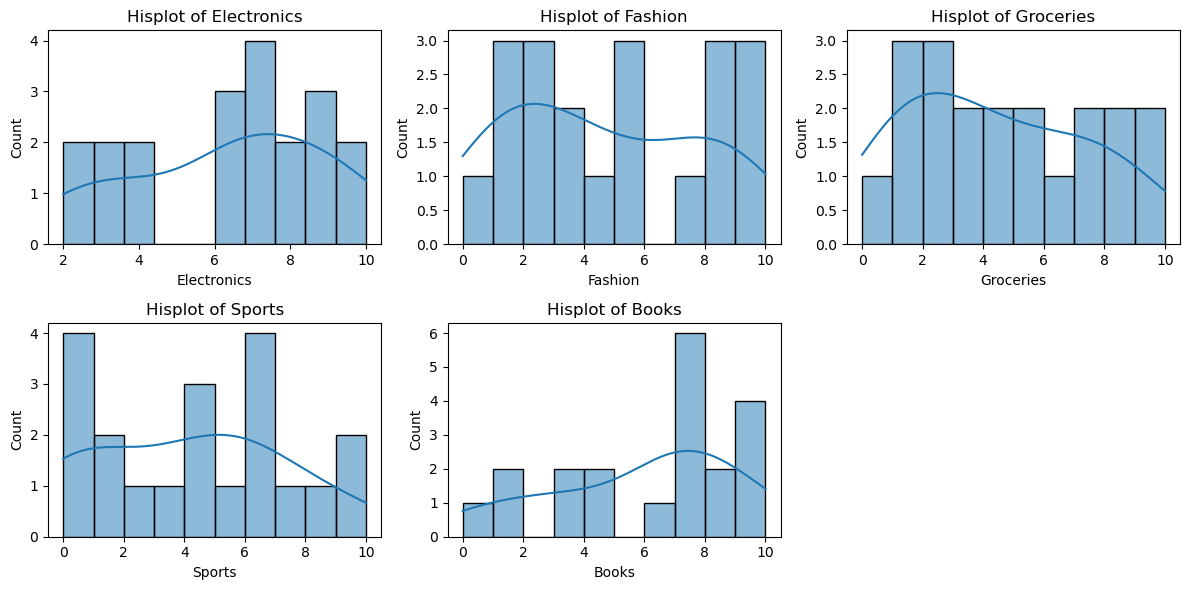

In [40]:
plt.figure(figsize=(12, 6))
for i,col in enumerate(df.columns[1:], 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],bins=10, kde=True)
    plt.title(f"Hisplot of {col}")
plt.tight_layout()
plt.show()

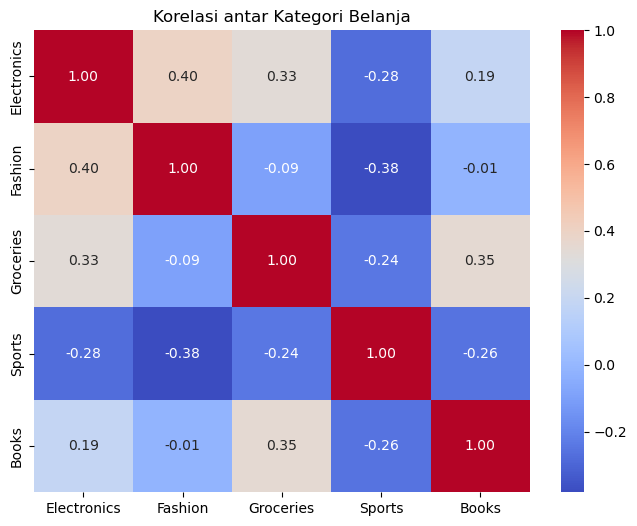

In [41]:
# Heatmap korelasi antar kategori
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Kategori Belanja")
plt.show()


# Preprocessing

In [42]:
X = df.iloc[:, 1:]  # ambil hanya fitur numerik (tanpa user_id)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Menentukan jumlah cluster (Elbow method)

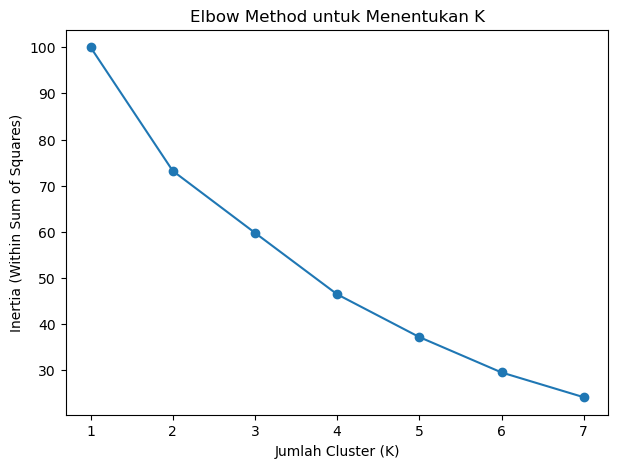

In [43]:
inertia = []
K_range = range(1, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia (Within Sum of Squares)")
plt.title("Elbow Method untuk Menentukan K")
plt.show()

# K-means Clustering

In [44]:
# Dari Elbow, misal kita pilih K=3
kmeans_final = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Tambahkan hasil cluster ke dataframe
df["cluster"] = clusters

# analisis hasil

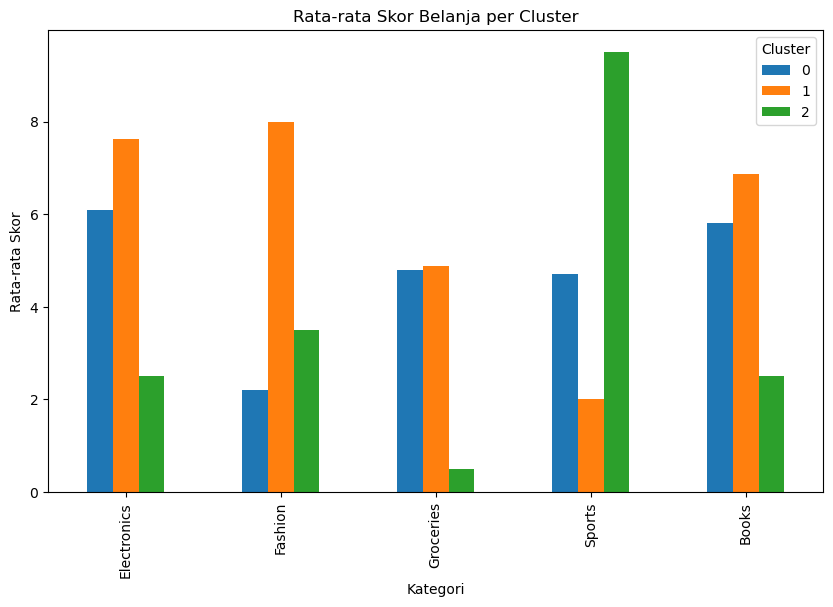

,user_id,Electronics,Fashion,Groceries,Sports,Books,cluster
0,U01,6,3,10,7,4,0
1,U02,6,9,2,6,10,1
2,U03,10,7,4,3,7,1
3,U04,7,2,5,4,1,0
4,U05,7,5,1,4,0,0
5,U06,9,5,8,0,10,1
6,U07,10,9,2,6,3,1
7,U08,8,2,4,2,6,0
8,U09,4,8,6,1,3,1
9,U10,8,1,9,8,9,0


In [45]:
cluster_means = df.groupby("cluster").mean(numeric_only=True)

# Visualisasi profil cluster
cluster_means.T.plot(kind="bar", figsize=(10, 6))
plt.title("Rata-rata Skor Belanja per Cluster")
plt.ylabel("Rata-rata Skor")
plt.xlabel("Kategori")
plt.legend(title="Cluster")
plt.show()


df